In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import json
import cv2
import matplotlib.pyplot as plt



In [9]:
# Load the COCO annotation file
with open('/content/drive/MyDrive/Datasets/arod/ann.json') as f:
    data = json.load(f)
# Get the image file names
image_filenames = [img['file_name'] for img in data['images']]


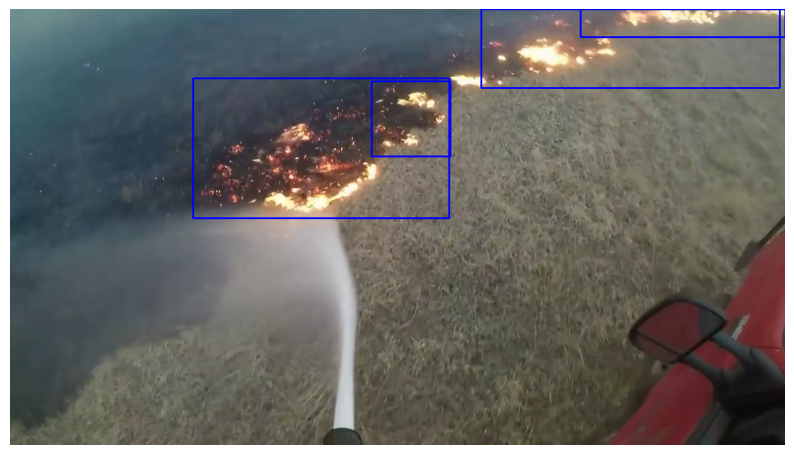

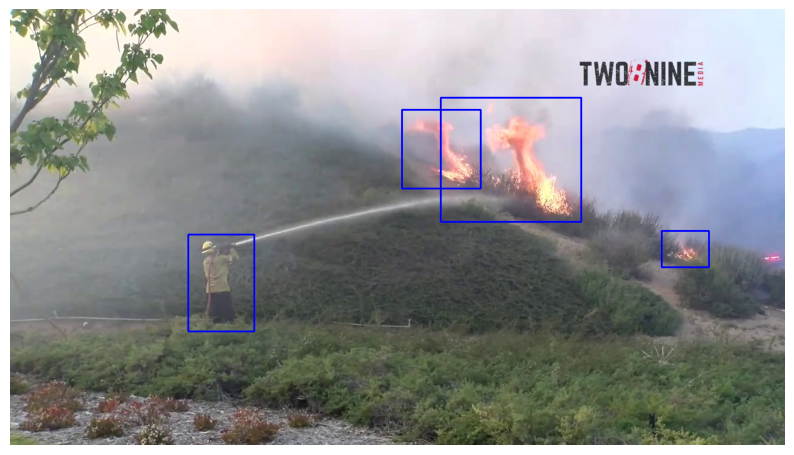

In [10]:
# Load and display the images with bounding boxes
for i, filename in enumerate(image_filenames[:2]):
    # Load the image (whoopsie double folder)
    img = cv2.imread('/content/drive/MyDrive/Datasets/arod/train/images/' + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the image id
    image_id = data['images'][i]['id']
    
    # Get the image width and height
    image_width = data['images'][i]['width']
    image_height = data['images'][i]['height']
    
    # Get the annotations for this image
    annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]
    
    # Draw the bounding boxes
    for ann in annotations:
        x, y, w, h = ann['bbox']
        
        img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (0, 0, 255), 2)

    # Create a figure with a specified size
    plt.figure(figsize=(10,10))
    plt.axis('off')
    # Show the image
    plt.imshow(img)
    plt.show()

In [11]:
!nvidia-smi

Mon May  8 00:55:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.0/566.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 26.4 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO

In [14]:
!yolo task=detect mode =predict model=yolov8l.pt conf=0.25 source='https://thumbs.dreamstime.com/z/aerial-view-crowd-people-connected-lines-social-media-communication-concept-top-view-men-women-isolated-white-203454228.jpg'

100% 83.7M/83.7M [00:00<00:00, 186MB/s]

100% 91.9k/91.9k [00:00<00:00, 4.20MB/s]
image 1/1 /content/aerial-view-crowd-people-connected-lines-social-media-communication-concept-top-view-men-women-isolated-white-203454228.jpg: 448x640 31 persons, 59.1ms
Speed: 8.2ms preprocess, 59.1ms inference, 37.3ms postprocess per image at shape (1, 3, 640, 640)


**Custom Data Training**

In [15]:
!yolo task=detect mode=train model=yolov8l.pt data=../content/drive/MyDrive/Datasets/arod/data.yaml  epochs=50 imgsz=640

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=../content/drive/MyDrive/Datasets/arod/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 